In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('lynsainkent.db')
data = pd.read_sql_query("SELECT * FROM FEstats", conn)

data.head(5)

,game_number,victory_rank,survival_rank,tactic_rank,units
0,0,S,1,6,Sain-Kent-Lyn
1,1,F,1,2,Kent-Sain-Lyn
2,2,F,1,2,Kent-Sain-Lyn
3,3,F,2,7,Kent-Sain-Lyn
4,4,S,0,7,Sain-Kent-Lyn


In [3]:
data['victory_rank'].value_counts()

S    159894
F     90106
Name: victory_rank, dtype: int64

<AxesSubplot:xlabel='victory_rank', ylabel='game_number'>

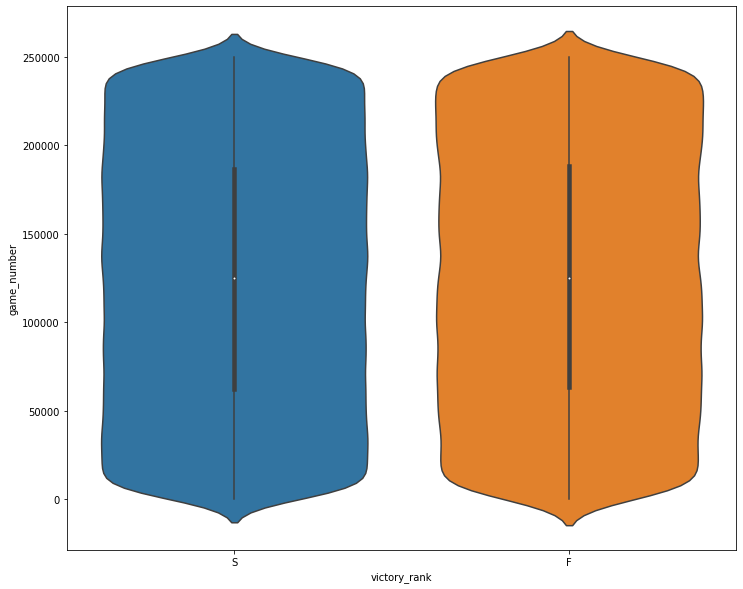

In [4]:
plt.figure(figsize=(12,10))
sns.violinplot(x='victory_rank', y='game_number', data=data)

<AxesSubplot:xlabel='survival_rank', ylabel='game_number'>

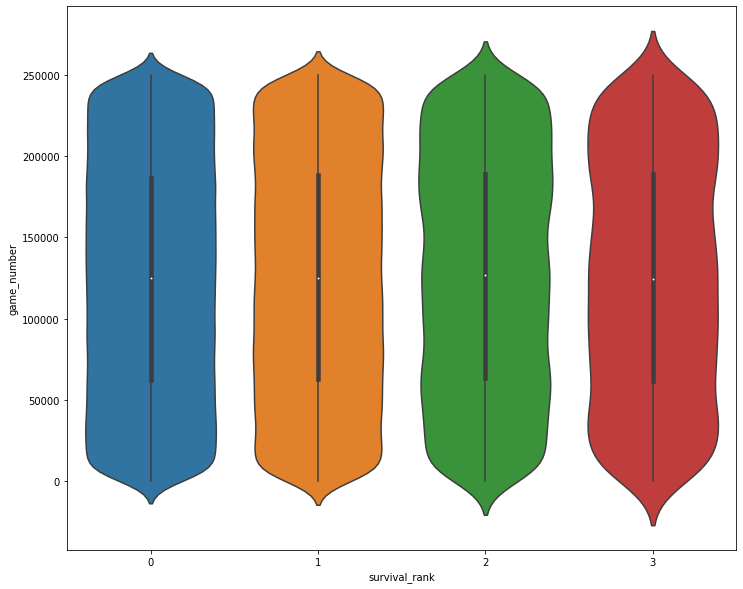

In [5]:
plt.figure(figsize=(12,10))
sns.violinplot(x='survival_rank', y='game_number', data=data)

In [6]:
data['survival_rank'].value_counts()

0    131291
1     97299
2     16927
3      4483
Name: survival_rank, dtype: int64

<AxesSubplot:xlabel='game_number', ylabel='tactic_rank'>

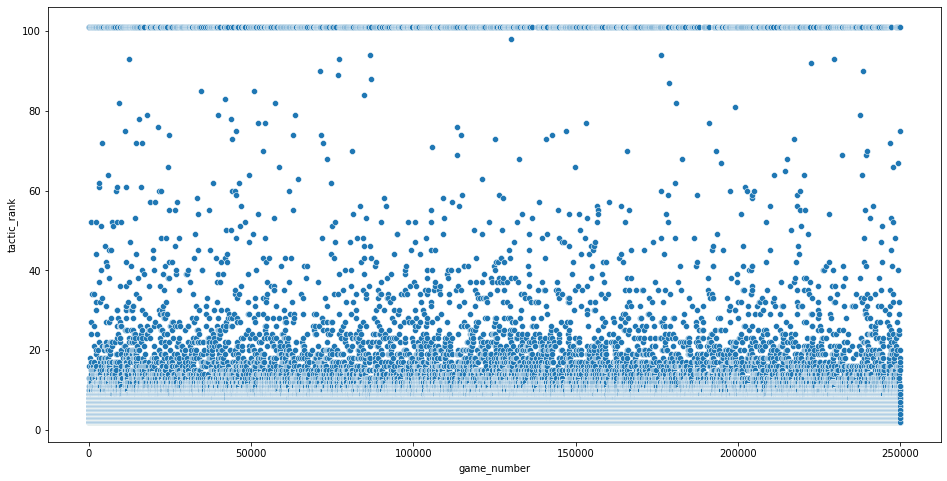

In [9]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='game_number', y='tactic_rank', data=data)

In [10]:
data[["unit_1", "unit_2", "unit_3"]] = data["units"].str.split(pat="-", expand=True)
data.head(10)

,game_number,victory_rank,survival_rank,tactic_rank,units,unit_1,unit_2,unit_3
0,0,S,1,6,Sain-Kent-Lyn,Sain,Kent,Lyn
1,1,F,1,2,Kent-Sain-Lyn,Kent,Sain,Lyn
2,2,F,1,2,Kent-Sain-Lyn,Kent,Sain,Lyn
3,3,F,2,7,Kent-Sain-Lyn,Kent,Sain,Lyn
4,4,S,0,7,Sain-Kent-Lyn,Sain,Kent,Lyn
5,5,F,3,10,Kent-Sain-Lyn,Kent,Sain,Lyn
6,6,F,3,7,Kent-Sain-Lyn,Kent,Sain,Lyn
7,7,F,2,3,Kent-Sain-Lyn,Kent,Sain,Lyn
8,8,S,0,6,Sain-Kent-Lyn,Sain,Kent,Lyn
9,9,S,1,6,Sain-Kent-Lyn,Sain,Kent,Lyn


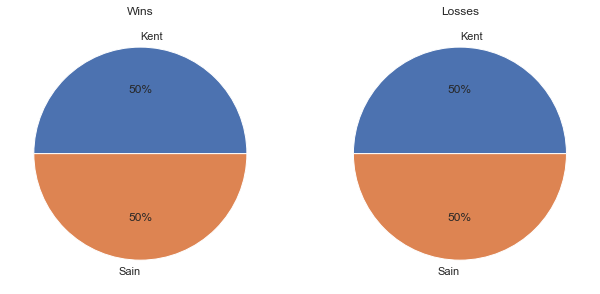

In [12]:
all_wins = data[data['victory_rank'] == 'S']
m_all_wins = pd.melt(all_wins, id_vars=['victory_rank'], value_vars=['unit_1', 'unit_2'])
all_losses = data[data['victory_rank'] == 'F']
m_all_losses = pd.melt(all_losses, id_vars=['victory_rank'], value_vars=['unit_1', 'unit_2'])

wins_count = m_all_wins.value_counts(subset='value').sort_index()
loss_count = m_all_losses.value_counts(subset='value').sort_index()

fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10.5, 5.5)
axs[0].pie(wins_count, labels=wins_count.index, autopct='%.0f%%')
axs[1].pie(loss_count, labels=loss_count.index, autopct='%.0f%%')
axs[0].title.set_text('Wins')
axs[1].title.set_text('Losses')
plt.show()
# lol duh